<a href="https://colab.research.google.com/github/ghhyc/Project-4/blob/main/Heart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Attack prediction using Machine Learning.**

##Features listed below.

  1. age - years
  2. sex (0-female, 1-male)
  3. chest_pain_type -chest pain (0-asymptomatic, 1=typical angina, 2=atypical angina, 3=non-agina pain.
  4. resting_bps- resting blood pressure upon arrival to hospital (Hg/mm)
  5. cholesterol - cholesterol (mg/dl)
  6. fasting_blood_sugar - fasting blood sugar > 120 mg/dL (0=false, 1=true)
  7. resting_ecg - resting electro-cardiagram results (0=normal, 1=hyperthrophy, 2=having ST-T abnormal)
  8. max_heart_rate - max. heart rate 
  9. excercise_angina - excercise induced angina (0=no, 1=yes)
  10. oldpeak - ST depression induced by excercise relative to resting
  11. ST_slope - 
  12. **target** - 0=chance of heart attack is low, 1= chance of heart attack is high.
  

In [1]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier

In [3]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Loading data into DataFrame and try to understand dataset.


In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path='/content/drive/MyDrive/heart_statlog_cleveland_hungary_final.csv'
heart = pd.read_csv(path)
heart

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264.0,0,0,132,0,1.2,2,1
1186,68,1,4,144,193.0,1,0,141,0,3.4,2,1
1187,57,1,4,130,131.0,0,0,115,1,1.2,2,1
1188,57,0,2,130,236.0,0,2,174,0,0.0,2,1


In [6]:

heart.describe()

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1018.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,245.906680,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,57.244599,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,209.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,240.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bps          1190 non-null   int64  
 4   cholesterol          1018 non-null   float64
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 111.7 KB


In [8]:
# Remove any rows with empty values
heart.replace(float('nan'), np.nan, inplace=True)
heart.dropna(inplace=True)

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1018 non-null   int64  
 1   sex                  1018 non-null   int64  
 2   chest_pain_type      1018 non-null   int64  
 3   resting_bps          1018 non-null   int64  
 4   cholesterol          1018 non-null   float64
 5   fasting_blood_sugar  1018 non-null   int64  
 6   resting_ecg          1018 non-null   int64  
 7   max_heart_rate       1018 non-null   int64  
 8   exercise_angina      1018 non-null   int64  
 9   oldpeak              1018 non-null   float64
 10  ST_slope             1018 non-null   int64  
 11  target               1018 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 103.4 KB


In [10]:
heart.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


#Correlation Analysis - combination of features that provides information if someone will have a heart attack.

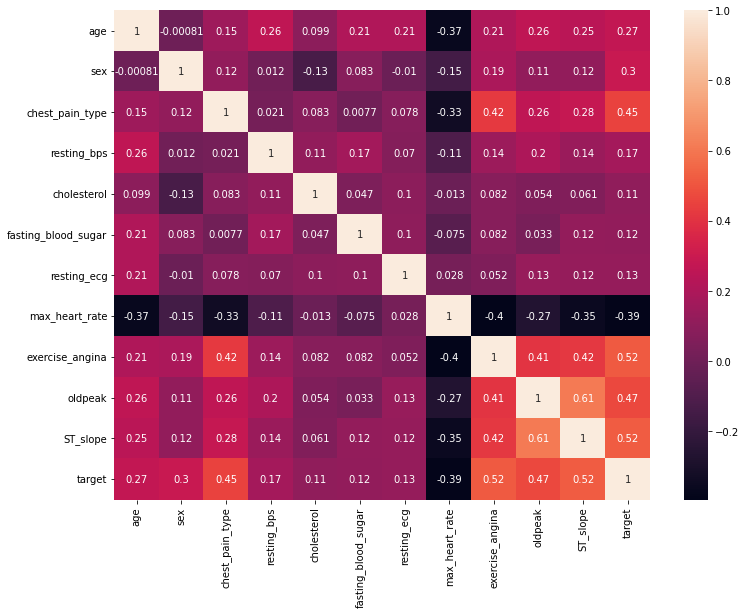

In [11]:
cor = heart.corr()
plt.figure(figsize =  (12,9))
sns.heatmap(cor, annot = True)

#Feature Analysis

In [44]:
interest_list =["age","resting_bps","cholesterol","max_heart_rate", "oldpeak", "target"]

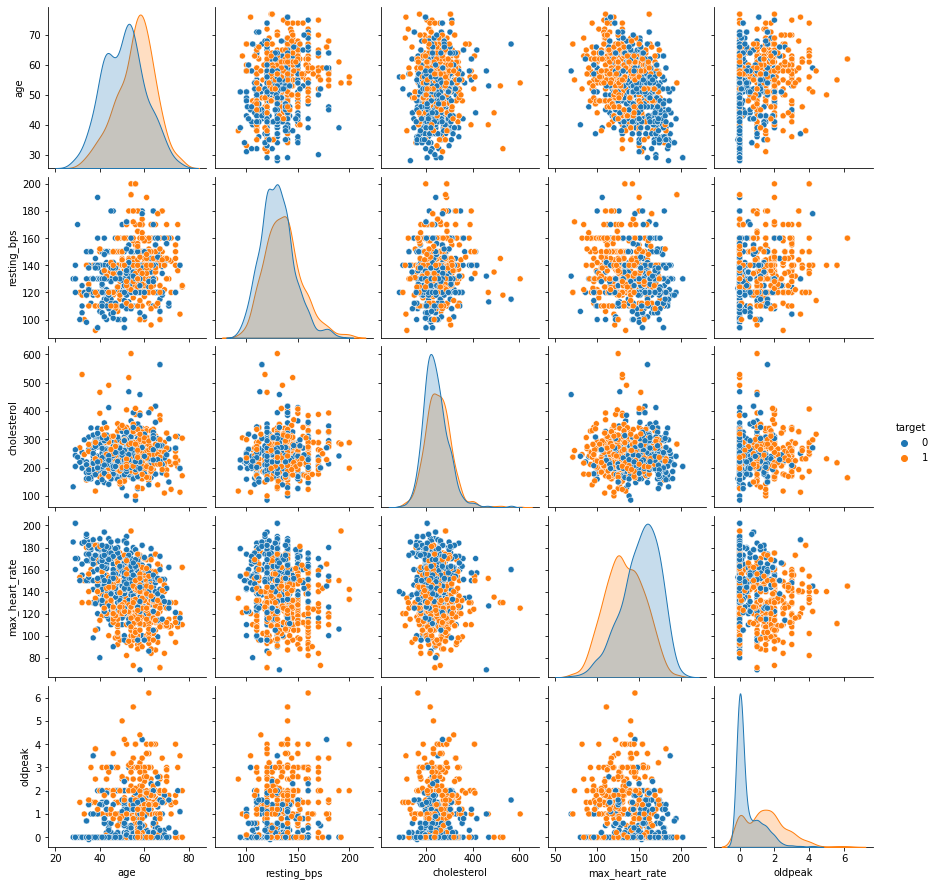

In [45]:
interest= heart.loc[:,interest_list]
sns.pairplot(interest,hue="target",diag_kind="kde")
plt.show()

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier

In [47]:
heart.sex.value_counts().to_frame()

# majority of paitents are males (2x)

,sex
1,748
0,270


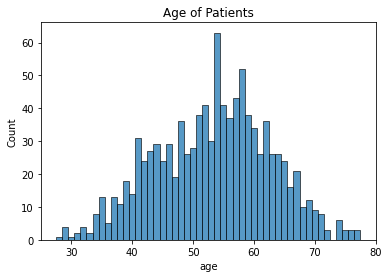

In [48]:
sns.histplot(heart.age, discrete=True)
plt.title("Age of Patients")
plt.show()

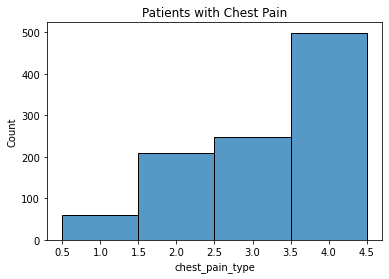

In [49]:
#patients with chest pain (chest_pain_type)

sns.histplot(heart.chest_pain_type, discrete=True)
plt.title("Patients with Chest Pain")
plt.show()

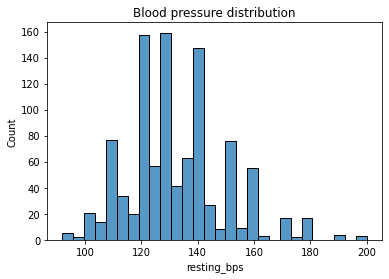

In [50]:
sns.histplot(heart.resting_bps)
plt.title('Blood pressure distribution')
plt.show()

##**source** https://www.cdc.gov/bloodpressure/about.htm

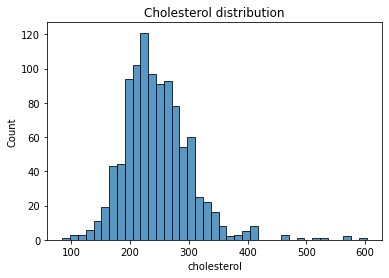

In [52]:
sns.histplot(heart.cholesterol)
plt.title('Cholesterol distribution')
plt.show()

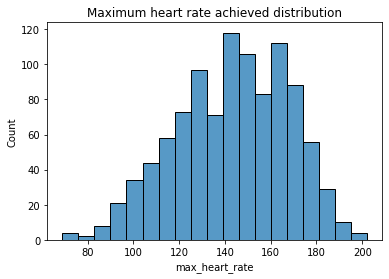

In [53]:
sns.histplot(heart.max_heart_rate)
plt.title('Maximum heart rate achieved distribution')
plt.show()

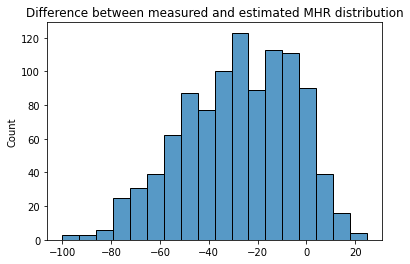

In [54]:
sns.histplot(heart.max_heart_rate - (208 - (0.7 * heart.age)))
plt.title('Difference between measured and estimated MHR distribution')
plt.show()

**the target is features that may have influence of other features by comparing dist. for high risk(1) and low risk(0)

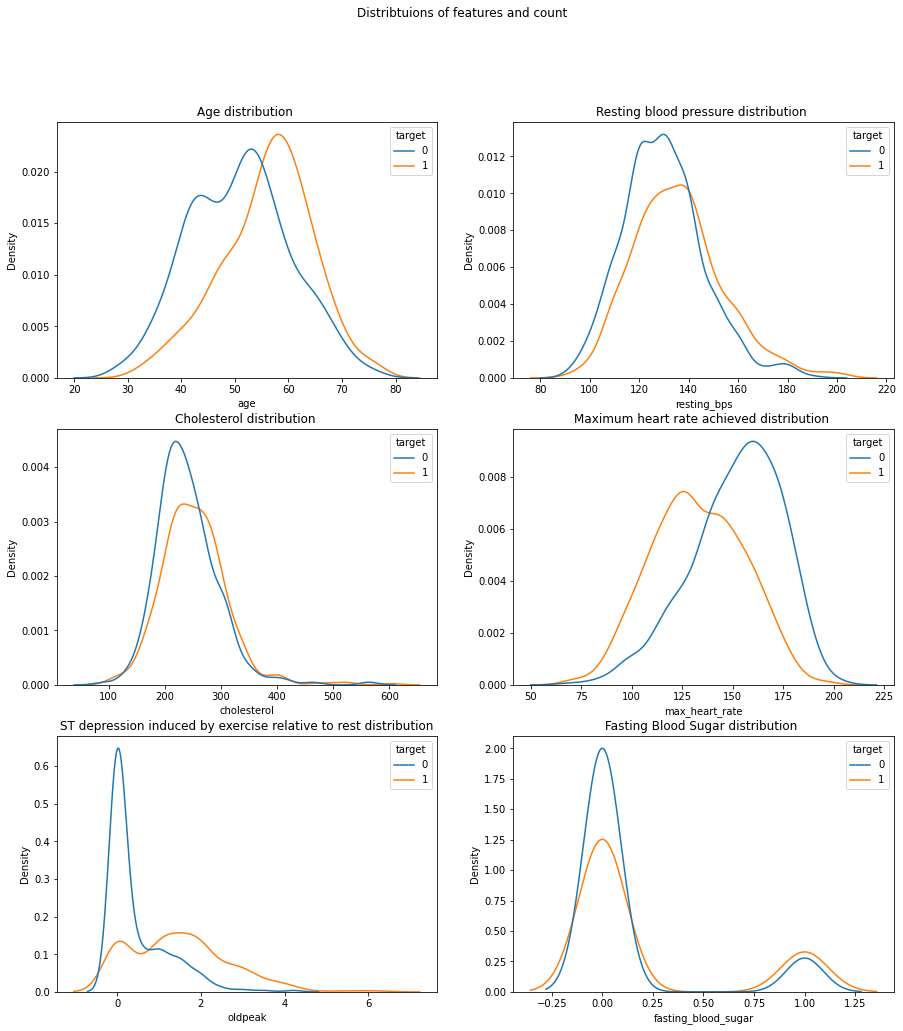

In [55]:
_, axes = plt.subplots(3, 2, figsize=(15,16))
sns.kdeplot(data=heart, x='age', hue='target', ax=axes[0, 0])
axes[0, 0].set_title('Age distribution ')
sns.kdeplot(data=heart, x='resting_bps', hue='target', ax=axes[0, 1])
axes[0, 1].set_title('Resting blood pressure distribution ')
sns.kdeplot(data=heart, x='cholesterol', hue='target', ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol distribution ')
sns.kdeplot(data=heart, x='max_heart_rate', hue='target', ax=axes[1, 1])
axes[1, 1].set_title('Maximum heart rate achieved distribution ')  
sns.kdeplot(data=heart, x='oldpeak', hue='target', ax=axes[2, 0])
axes[2, 0].set_title('ST depression induced by exercise relative to rest distribution')
sns.kdeplot(data=heart, x='fasting_blood_sugar', hue='target', ax=axes[2, 1])
axes[2, 1].set_title('Fasting Blood Sugar distribution ')
plt.suptitle('Distribtuions of features and count')
plt.show()

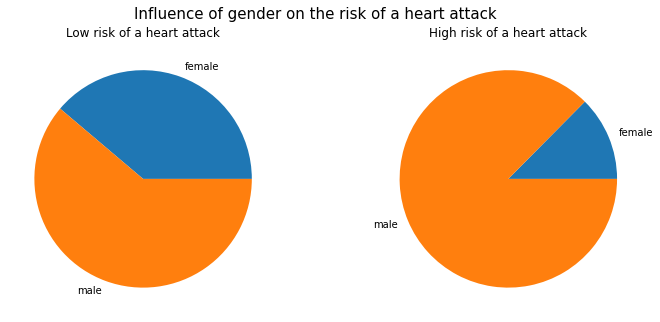

In [56]:
_, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].pie(heart.query('target == 0').groupby('sex')['sex'].count(), labels=['female', 'male'])
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(heart.query('target == 1').groupby('sex')['sex'].count(), labels=['female', 'male'])
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of gender on the risk of a heart attack', fontsize=15)
plt.show()

In [57]:
heart.groupby('target', as_index=False)['sex'].mean() # this means that men are 87% likely to have heart disease while women are 61.1% prone to it.

,target,sex
0,0,0.611830
1,1,0.874214


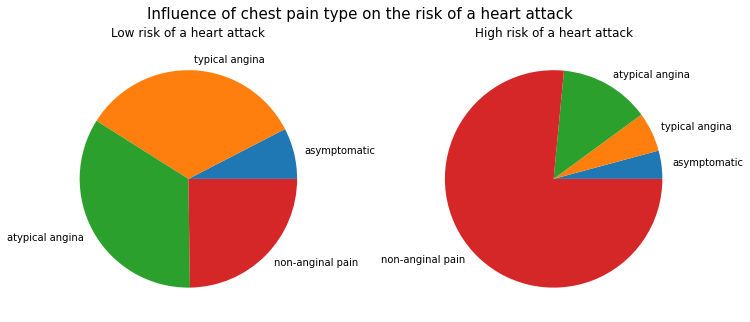

In [58]:
#Let's consider chest pain


_, axes = plt.subplots(1, 2, figsize=(12,5)) 

labels = ['asymptomatic', 'typical angina', 'atypical angina', 'non-anginal pain']

axes[0].pie(heart.query('target == 0').groupby('chest_pain_type')['chest_pain_type'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(heart.query('target == 1').groupby('chest_pain_type')['chest_pain_type'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of chest pain type on the risk of a heart attack', fontsize=15)
plt.show()

# from the chart above, it seems that any type of chest pain are considered at risk.

In [59]:
#feature engineering

rf_classifier = RandomForestClassifier(max_depth=8,
                                       n_estimators=100,
                                       random_state=42)
rf_classifier.fit(heart.drop('target', axis=1), heart['target'])

RandomForestClassifier(max_depth=8, random_state=42)

In [60]:
# determine the hierchy of importance
importance = pd.concat([pd.Series(heart.columns[:-1]), 
                        pd.Series(rf_classifier.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance = importance.sort_values(by='importance', ascending=False)
importance

,feature,importance
10,ST_slope,0.211326
2,chest_pain_type,0.134385
9,oldpeak,0.132743
8,exercise_angina,0.113177
7,max_heart_rate,0.103351
0,age,0.078141
4,cholesterol,0.075740
3,resting_bps,0.072095
1,sex,0.044626
6,resting_ecg,0.026731


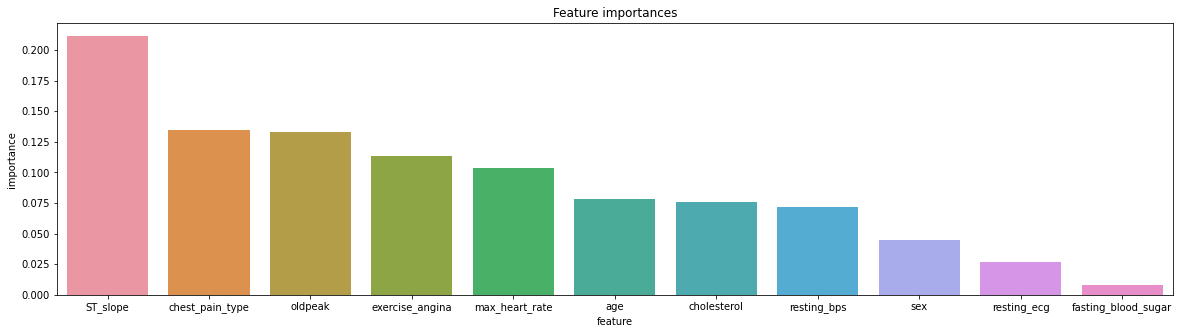

In [61]:
plt.figure(figsize=(20,5))
sns.barplot(data=importance, x='feature', y='importance')
plt.title('Feature importances')
plt.show()

In [62]:
heart2 = heart.drop('fasting_blood_sugar', axis=1)

#Feature Engineering

##adding new features such as Medical Heart Rate achieved. In common medical practice, it is calculated by MHR=208-(0.7*age)

In [63]:
heart2['mhr_estimate'] = 208 - (0.7 * heart2['age'])

As it was discussed before, we can make a new categorical feature from blood pressure using the following label system:

pressure < 120 = 0 (normal)
120 <= pressure < 140 = 1 (elevated)
140 <= pressure = 2 (high)

In [64]:
heart2['blood_pressure'] = heart2['resting_bps'].apply(lambda x: 0 if x < 120 else (1 if x < 140 else 2))

In [65]:
heart2['blood_pressure'].value_counts().to_frame()

,blood_pressure
1,482
2,363
0,173


##The same idea can be applied to cholesterol levels
https://www.pennmedicine.org/updates/blogs/heart-and-vascular-blog/2015/february/protecting-your-heart-what-is-a-healthy-cholesterol-level-for-you

* cholesterol < 200 = 0 (desirable)
* 200 <= cholesterol < 240 = 1 (borderline)
* 240 <= cholesterol = 2 (high)

In [94]:
heart2['cholesterol_level'] = heart2['cholesterol'].apply(lambda x: 0 if x < 200 else (1 if x < 240 else 2))

In [95]:
heart2['cholesterol_level'].value_counts().to_frame()

,cholesterol_level
2,510
1,323
0,185


Also, we can make a feature that will characterize both of the last considered features. Let's simply summarize two categories. If a person has 0, it means that he has normal blood pressure and normal cholesterol. But if the value is 4, it means that he has high blood pressure and high cholesterol.

In [96]:
heart2['pres_chol_summary'] = heart2['blood_pressure'] + heart2['cholesterol_level']

In [98]:
heart2['pres_chol_summary'].value_counts().to_frame()

,pres_chol_summary
3,347
2,293
4,195
1,144
0,39


##In the previous section we summed other categorical features and were able to observe the difference in the target. Let's do the same here. The interpretation of the features is simple - the lower value< the better person's health according to these tests.


In [99]:
heart2['summary'] = heart2['chest_pain_type'] + heart2['resting_ecg'] + heart2['exercise_angina'] + heart2['max_heart_rate']

In [100]:
heart2.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target,mhr_estimate,blood_pressure,cholesterol_level,presssure_cholesterol_summary,summary,pres_chol_summary
0,40,1,2,140,289.0,0,172,0,0.0,1,0,180.0,2,2,4,174,4
1,49,0,3,160,180.0,0,156,0,1.0,2,1,173.7,2,0,2,159,2
2,37,1,2,130,283.0,1,98,0,0.0,1,0,182.1,1,2,3,101,3
3,48,0,4,138,214.0,0,108,1,1.5,2,1,174.4,1,1,2,113,2
4,54,1,3,150,195.0,0,122,0,0.0,1,0,170.2,2,0,2,125,2


In [101]:
heart2['summary'].value_counts().to_frame()

,summary
165,25
164,25
157,23
152,22
144,22
...,...
73,1
89,1
111,1
92,1


In [102]:
heart2.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target,mhr_estimate,blood_pressure,cholesterol_level,presssure_cholesterol_summary,summary,pres_chol_summary
0,40,1,2,140,289.0,0,172,0,0.0,1,0,180.0,2,2,4,174,4
1,49,0,3,160,180.0,0,156,0,1.0,2,1,173.7,2,0,2,159,2
2,37,1,2,130,283.0,1,98,0,0.0,1,0,182.1,1,2,3,101,3
3,48,0,4,138,214.0,0,108,1,1.5,2,1,174.4,1,1,2,113,2
4,54,1,3,150,195.0,0,122,0,0.0,1,0,170.2,2,0,2,125,2


##asses the new changes with cross validation and compare the old heart data set and new heart data set.

In [103]:
# assess the changes using cross validation

cross_val_score(
    estimator=RandomForestClassifier(max_depth=8,
                                     n_estimators=100,
                                     random_state=42),
    X=heart.drop('target', axis=1),
    y=heart['target'],
    scoring='f1',
    cv=5
).mean()

0.8941401712115798

In [104]:
cross_val_score(
    estimator=RandomForestClassifier(max_depth=8,
                                     n_estimators=100,
                                     random_state=42),
    X=heart2.drop('target', axis=1),
    y=heart2['target'],
    scoring='f1',
    cv=5
).mean()

0.8973155813181173

#Data Prep for Machine Learning

*   numerical features
*   categorical features

included all features because I think they all help tell if an individual is prone to heart attack.




In [105]:
num_features = ['age', 'resting_bps', 'cholesterol', 'max_heart_rate', 'oldpeak', 'mhr_estimate']
cat_features = ['sex', 'chest_pain_type', 'resting_ecg', 'exercise_angina', 'ST_slope', 'blood_pressure', 'cholesterol_level', 'pres_chol_summary', 'summary']

In [106]:
#Now we can create the matrix of features and the dependent variable vector.

features = heart2.drop('target', axis=1)
target = heart2['target'].astype('int')

In [107]:
print(features.shape)
print(target.shape)

(1018, 16)
(1018,)


Preparation for CatBoost
CatBoost is one of the most efficient gradient boosting libraries. According to the library documentation, it's not recommended to do data preparation beforehand (especially for categorical features, because CatBoost has its own built-in mechanisms to handle categorical features). Feature scaling also will be omitted. One thing we have to do is splitting the dataset.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) 

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(814, 16)
(204, 16)
(814,)
(204,)


In [110]:
#To avoid any conflicts in the fiture we have to transform our categorical features to string type.

X_train[cat_features] = X_train[cat_features].astype('str')
X_test[cat_features] = X_test[cat_features].astype('str')


In [ ]:
X_train.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,mhr_estimate,blood_pressure,cholesterol_level,pres_chol_summary,summary
137,39,1,2,120,241.0,1,146,0,2.0,1,180.7,1,2,3,149
952,60,1,4,145,282.0,2,142,1,2.8,2,166.0,2,2,4,149
926,61,1,3,150,243.0,0,137,1,1.0,2,165.3,2,2,4,141
289,48,0,2,133,308.0,1,156,0,2.0,1,174.4,1,2,3,159
1071,60,0,4,158,305.0,2,161,0,0.0,1,166.0,2,2,4,167


In [111]:
X_test.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,mhr_estimate,blood_pressure,cholesterol_level,presssure_cholesterol_summary,summary,pres_chol_summary
700,41,1,3,130,214.0,2,168,0,2.0,2,179.3,1,1,2,173,2
1086,59,1,1,160,273.0,2,125,0,0.0,1,166.7,2,2,4,128,4
759,50,1,3,140,233.0,0,163,0,0.6,2,173.0,2,1,3,166,3
31,56,1,3,130,167.0,0,114,0,0.0,1,168.8,1,0,1,117,1
136,43,0,2,120,215.0,1,175,0,0.0,1,177.9,1,1,2,178,2


#Encoding categorical data
In the dataset, all categorical variables have been already encoded by label encoding. I don't find this a good idea. Let's use Ohe Hot Encoding.

In [112]:
features_encoding = pd.get_dummies(features, drop_first=True, columns=cat_features)

In [113]:
features_encoding.head()

,age,resting_bps,cholesterol,max_heart_rate,oldpeak,mhr_estimate,presssure_cholesterol_summary,sex_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_1,resting_ecg_2,exercise_angina_1,ST_slope_1,ST_slope_2,ST_slope_3,blood_pressure_1,blood_pressure_2,cholesterol_level_1,cholesterol_level_2,pres_chol_summary_1,pres_chol_summary_2,pres_chol_summary_3,pres_chol_summary_4,summary_75,summary_77,summary_84,summary_88,summary_89,summary_91,summary_92,summary_93,summary_94,summary_96,summary_97,summary_98,summary_99,summary_100,summary_101,...,summary_158,summary_159,summary_160,summary_161,summary_162,summary_163,summary_164,summary_165,summary_166,summary_167,summary_168,summary_169,summary_170,summary_171,summary_172,summary_173,summary_174,summary_175,summary_176,summary_177,summary_178,summary_179,summary_180,summary_181,summary_182,summary_183,summary_184,summary_185,summary_186,summary_187,summary_188,summary_189,summary_190,summary_191,summary_192,summary_193,summary_194,summary_197,summary_199,summary_206
0,40,140,289.0,172,0.0,180.0,4,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,49,160,180.0,156,1.0,173.7,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,37,130,283.0,98,0.0,182.1,3,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48,138,214.0,108,1.5,174.4,2,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,54,150,195.0,122,0.0,170.2,2,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Train-test split
Let's split the data into the training and test sets in the ratio 80/20.

In [114]:
features_train, features_test, target_train, target_test = train_test_split(features_encoding, target, test_size=0.2, random_state=42)

In [115]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(814, 136)
(204, 136)
(814,)
(204,)


In [116]:
# Standardized
scaler = StandardScaler()
features_train[num_features] = scaler.fit_transform(features_train[num_features])
features_test[num_features] = scaler.transform(features_test[num_features])

In [117]:
features_train.head()

,age,resting_bps,cholesterol,max_heart_rate,oldpeak,mhr_estimate,presssure_cholesterol_summary,sex_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_1,resting_ecg_2,exercise_angina_1,ST_slope_1,ST_slope_2,ST_slope_3,blood_pressure_1,blood_pressure_2,cholesterol_level_1,cholesterol_level_2,pres_chol_summary_1,pres_chol_summary_2,pres_chol_summary_3,pres_chol_summary_4,summary_75,summary_77,summary_84,summary_88,summary_89,summary_91,summary_92,summary_93,summary_94,summary_96,summary_97,summary_98,summary_99,summary_100,summary_101,...,summary_158,summary_159,summary_160,summary_161,summary_162,summary_163,summary_164,summary_165,summary_166,summary_167,summary_168,summary_169,summary_170,summary_171,summary_172,summary_173,summary_174,summary_175,summary_176,summary_177,summary_178,summary_179,summary_180,summary_181,summary_182,summary_183,summary_184,summary_185,summary_186,summary_187,summary_188,summary_189,summary_190,summary_191,summary_192,summary_193,summary_194,summary_197,summary_199,summary_206
137,-1.523198,-0.699811,-0.076074,0.125185,0.969539,1.523198,3,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
952,0.695029,0.735356,0.638105,-0.038117,1.694744,-0.695029,4,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
926,0.800659,1.022389,-0.041236,-0.242244,0.063032,-0.800659,4,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
289,-0.572529,0.046475,1.090999,0.533438,0.969539,0.572529,3,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1071,0.695029,1.481642,1.038742,0.737565,-0.843474,-0.695029,4,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
features_test.head()

,age,resting_bps,cholesterol,max_heart_rate,oldpeak,mhr_estimate,presssure_cholesterol_summary,sex_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_1,resting_ecg_2,exercise_angina_1,ST_slope_1,ST_slope_2,ST_slope_3,blood_pressure_1,blood_pressure_2,cholesterol_level_1,cholesterol_level_2,pres_chol_summary_1,pres_chol_summary_2,pres_chol_summary_3,pres_chol_summary_4,summary_75,summary_77,summary_84,summary_88,summary_89,summary_91,summary_92,summary_93,summary_94,summary_96,summary_97,summary_98,summary_99,summary_100,summary_101,...,summary_158,summary_159,summary_160,summary_161,summary_162,summary_163,summary_164,summary_165,summary_166,summary_167,summary_168,summary_169,summary_170,summary_171,summary_172,summary_173,summary_174,summary_175,summary_176,summary_177,summary_178,summary_179,summary_180,summary_181,summary_182,summary_183,summary_184,summary_185,summary_186,summary_187,summary_188,summary_189,summary_190,summary_191,summary_192,summary_193,summary_194,summary_197,summary_199,summary_206
700,-1.311939,-0.125745,-0.546388,1.023343,0.969539,1.311939,2,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1086,0.589399,1.596456,0.481334,-0.732149,-0.843474,-0.589399,4,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
759,-0.361270,0.448322,-0.215427,0.819216,-0.299570,0.361270,3,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0.272509,-0.125745,-1.365081,-1.181228,-0.843474,-0.272509,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
136,-1.100679,-0.699811,-0.528969,1.309121,-0.843474,1.100679,2,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Modeling
In this section, we will learn several models and compare their performance using cross-validation. For hyperparameters tuning RandomizedSearchCV will be used. As a target, metric we will use f1-score.

#Support Vector Machine (SVM)

In [119]:
#Support Vector Machine

parameters_svc = dict(
    C=loguniform(0.0001, 20),
    kernel=['rbf', 'poly'],
    gamma=loguniform(0.0001, 20)

)

In [120]:
%%time
random_search_svc = RandomizedSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_distributions=parameters_svc,
    n_iter=75,
    scoring='f1',
    cv=5,
    random_state=42
)
random_search_svc.fit(features_train, target_train)

CPU times: user 1min 3s, sys: 231 ms, total: 1min 3s
Wall time: 1min 3s


In [121]:
svc_cv_f1 = random_search_svc.best_score_
svc_cv_f1

0.8720783277467176

In [122]:
random_search_svc.best_params_

{'C': 16.29807899028078, 'gamma': 0.029807400160854865, 'kernel': 'rbf'}

In [124]:
best_svc = random_search_svc.best_estimator_

#Random forest
5 parameters will be tuned for the Random Forest.

In [125]:
parameters_rf = dict(
    n_estimators=range(5, 1000),
    max_depth=range(4, 30),
    min_samples_split=range(2, 10),
    min_samples_leaf=range(1, 10),
    max_features=range(2, features_train.shape[1])
)

In [126]:
%%time
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=parameters_rf,
    n_iter=75,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)
random_search_rf.fit(features_train, target_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: user 7min 31s, sys: 1.86 s, total: 7min 33s
Wall time: 7min 34s


In [127]:
rf_cv_f1 = random_search_rf.best_score_
rf_cv_f1

0.9055032941482036

In [128]:
random_search_rf.best_params_

{'max_depth': 21,
 'max_features': 39,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 631}

In [129]:
best_rf = random_search_rf.best_estimator_

#Category Boosting
As we discussed before, CatBoost will be trained on the unprepared data. 5 parameters will be tuned: learning rate (the higher - the bigger the step of the gradient descent), iterations, depth, l2_leaf_reg (regularization parameter), random_strength (a parameter that adds random to the model).


https://towardsdatascience.com/introduction-to-gradient-boosting-on-decision-trees-with-catboost-d511a9ccbd14

In [130]:
parameters_boost=dict(
    learning_rate=loguniform(0.0001, 0.5),
    iterations=range(10, 500),
    depth=range(3, 12),
    l2_leaf_reg=uniform(1, 20),
    random_strength=loguniform(0.001, 1000)
)

In [131]:
%%time
random_search_boost = RandomizedSearchCV(
    estimator=CatBoostClassifier(verbose=False, cat_features=cat_features, eval_metric='F1'),
    param_distributions=parameters_boost,
    n_iter=25,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)
random_search_boost.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CPU times: user 8min 35s, sys: 1min 19s, total: 9min 55s
Wall time: 5min 14s


In [132]:
random_search_boost.best_params_

{'depth': 9,
 'iterations': 240,
 'l2_leaf_reg': 9.207658460712594,
 'learning_rate': 0.06233916749428286,
 'random_strength': 0.02359331645804632}

In [133]:
import catboost
catboost_cv_f1 =random_search_boost.best_score_
catboost_cv_f1

0.894668682311169

In [134]:
best_catboost = random_search_boost.best_estimator_

#model comparision


In [135]:
results_cv = pd.DataFrame([
    ['svm', svc_cv_f1],
    ['random forest', rf_cv_f1],
    ['catboost', catboost_cv_f1]],
    columns=['model', 'f1-score on cross-validation']
)

In [136]:
results_cv

,model,f1-score on cross-validation
0,svm,0.872078
1,random forest,0.905503
2,catboost,0.894669


#evaluation of SVM, Random Forest, and Category Boosting



In [137]:
# need to make predictions.

svc_pred = best_svc.predict(features_test)
rf_pred = best_rf.predict(features_test)
catboost_pred = best_catboost.predict(X_test)

In [138]:
svc_pred_prob = best_svc.predict_proba(features_test)[:, 1]
rf_pred_prob = best_rf.predict_proba(features_test)[:, 1]
catboost_pred_prob = best_catboost.predict_proba(X_test)[:, 1]

# Verify through F1-scores

In [139]:
f1_svc_test = f1_score(target_test, svc_pred)
f1_svc_test

0.8446601941747574

In [140]:
f1_rf_test = f1_score(target_test, rf_pred)
f1_rf_test

0.9099526066350712

In [141]:
f1_catboost_test = f1_score(y_test, catboost_pred)
f1_catboost_test

0.8823529411764707

In [142]:
results_cv['f1-score on the test set'] = pd.Series([f1_svc_test, f1_rf_test, f1_catboost_test])

In [143]:
results_cv

,model,f1-score on cross-validation,f1-score on the test set
0,svm,0.872078,0.844660
1,random forest,0.905503,0.909953
2,catboost,0.894669,0.882353


#ROC-curve
ROC-curve is another important metric to evaluate the performance of a classification model. The main advantage is that it's independent of the classification thresholds.

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5


"What is the AUC - ROC Curve?
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease."

In [144]:
fpr_svc, tpr_svc, thresh_svc = roc_curve(target_test, svc_pred_prob)
fpr_rf, tpr_rf, thresh_rf = roc_curve(target_test, rf_pred_prob)
fpr_catboost, tpr_catboost, thresh_catboost = roc_curve(y_test, catboost_pred_prob)

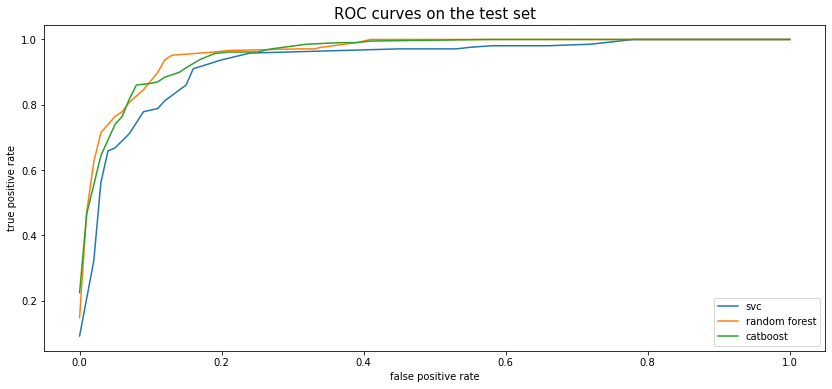

In [145]:
plt.figure(figsize=(14,6))
sns.lineplot(x=fpr_svc, y=tpr_svc, ci=None, label='svc')
sns.lineplot(x=fpr_rf, y=tpr_rf, ci=None, label='random forest')
sns.lineplot(x=fpr_catboost, y=tpr_catboost, ci=None, label='catboost')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curves on the test set', fontsize=15)
plt.legend()
plt.show()

In [146]:
#areas under the curve
roc_auc_svc_test = roc_auc_score(target_test, svc_pred_prob)
roc_auc_svc_test

0.9311538461538462

In [147]:
roc_auc_rf_test = roc_auc_score(target_test, rf_pred_prob)
roc_auc_rf_test

0.961826923076923

In [148]:
roc_auc_catboost_test = roc_auc_score(y_test, catboost_pred_prob)
roc_auc_catboost_test

0.9575961538461538

In [149]:
results_cv['roc_auc on the test set'] = pd.Series([roc_auc_svc_test, roc_auc_rf_test, roc_auc_catboost_test])

In [150]:
results_cv

,model,f1-score on cross-validation,f1-score on the test set,roc_auc on the test set
0,svm,0.872078,0.844660,0.931154
1,random forest,0.905503,0.909953,0.961827
2,catboost,0.894669,0.882353,0.957596


#Features of Importance

In [151]:
final_importance = pd.concat([pd.Series(X_train.columns), pd.Series(best_catboost.feature_importances_)], axis=1)
final_importance.columns = ['feature', 'importance']
final_importance = final_importance.sort_values(by='importance', ascending=False)
final_importance

,feature,importance
9,ST_slope,14.432058
2,chest_pain_type,11.362836
6,max_heart_rate,10.287226
1,sex,9.377924
8,oldpeak,8.970216
4,cholesterol,7.119541
3,resting_bps,6.620608
5,resting_ecg,6.460532
7,exercise_angina,5.694379
10,mhr_estimate,4.563663


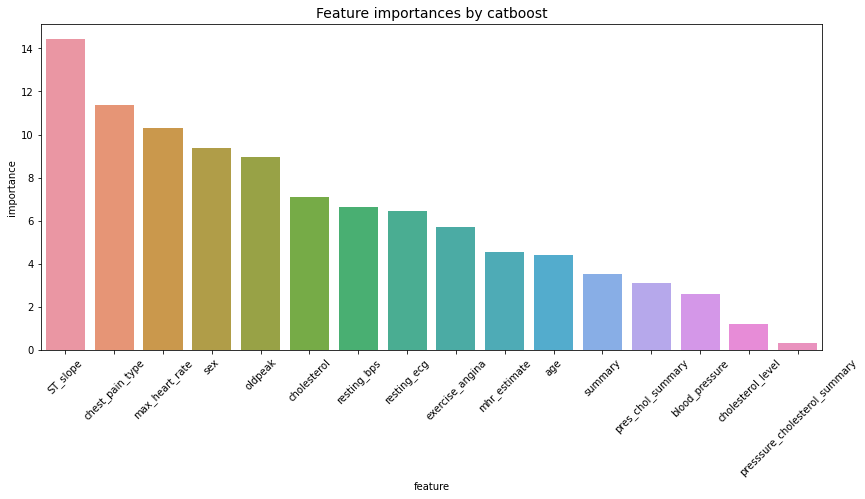

In [152]:
plt.figure(figsize=(14,6))
sns.barplot(data=final_importance, x='feature', y='importance')
plt.xticks(rotation=45)
plt.title('Feature importances by catboost', fontsize=14)
plt.show()

# Attempt to do Random Forest "leaves"

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(features_train, y_train)

#model performance and training

y_pred=model.predict(features_test)

In [ ]:
y_pred

array([0.11, 0.66, 0.77, 0.  , 0.  , 0.06, 0.76, 0.92, 0.81, 0.01, 0.88,
       0.  , 0.97, 0.84, 0.01, 0.85, 1.  , 1.  , 0.25, 1.  , 0.03, 0.91,
       0.37, 0.  , 1.  , 0.99, 0.07, 1.  , 0.01, 0.  , 0.03, 0.91, 0.99,
       0.13, 0.86, 0.  , 0.86, 0.  , 1.  , 0.04, 0.96, 0.12, 0.68, 0.  ,
       0.83, 0.  , 0.83, 0.08, 0.52, 0.  , 0.82, 0.79, 0.51, 0.57, 0.  ,
       1.  , 0.78, 0.69, 0.38, 0.  , 0.  , 0.9 , 0.99, 0.79, 0.66, 0.89,
       0.93, 0.75, 0.74, 0.78, 0.64, 0.77, 0.39, 0.24, 0.91, 0.63, 0.53,
       0.  , 0.36, 0.99, 0.2 , 0.05, 0.  , 0.97, 0.63, 0.03, 0.75, 1.  ,
       0.47, 0.93, 0.02, 0.99, 0.  , 0.  , 0.04, 0.74, 0.  , 0.  , 0.99,
       0.68, 0.  , 1.  , 0.88, 0.82, 0.08, 0.75, 0.88, 1.  , 0.13, 0.  ,
       0.23, 0.95, 0.53, 0.99, 0.96, 0.65, 0.09, 0.99, 0.1 , 1.  , 0.01,
       0.14, 0.36, 0.02, 1.  , 0.62, 0.73, 0.81, 0.8 , 0.  , 0.23, 1.  ,
       1.  , 0.98, 0.02, 0.17, 0.09, 0.13, 0.39, 0.03, 0.  , 0.8 , 0.83,
       0.04, 0.66, 0.25, 0.13, 0.92, 0.57, 0.04, 0.

In [ ]:
model.score(features_train, y_train)

0.9607016736274492

In [ ]:
#My model's performance on testing data.
model.score(features_test, y_test)

0.678649

In [ ]:
from sklearn.metrics import r2_score
accuracy_R=r2_score(y_test, y_pred)
accuracy_R


0.678649

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import graphviz

In [ ]:
import scipy.stats as stats

MSE=mean_squared_error(y_test, y_pred)
MSE

0.08030686274509805

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(features_train, y_train)

DecisionTreeRegressor()

In [ ]:
# printing the feature importance
print('Feature importances: \n', pd.DataFrame(decision_tree.feature_importances_,columns=['Importance'], 
                                              index=features_train.columns))

Feature importances: 
                 Importance
age               0.033059
resting_bps       0.025876
cholesterol       0.063737
max_heart_rate    0.068626
oldpeak           0.051816
...                    ...
summary_193       0.000000
summary_194       0.000000
summary_197       0.000000
summary_199       0.000000
summary_206       0.000000

[135 rows x 1 columns]


In [ ]:
! pip install graphviz

In [ ]:
! pip install pydot

In [ ]:
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [ ]:
features_train

,age,resting_bps,cholesterol,max_heart_rate,oldpeak,mhr_estimate,sex_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_1,resting_ecg_2,exercise_angina_1,ST_slope_1,ST_slope_2,ST_slope_3,blood_pressure_1,blood_pressure_2,cholesterol_level_1,cholesterol_level_2,pres_chol_summary_1,pres_chol_summary_2,pres_chol_summary_3,pres_chol_summary_4,summary_75,summary_77,summary_84,summary_88,summary_89,summary_91,summary_92,summary_93,summary_94,summary_96,summary_97,summary_98,summary_99,summary_100,summary_101,summary_102,...,summary_158,summary_159,summary_160,summary_161,summary_162,summary_163,summary_164,summary_165,summary_166,summary_167,summary_168,summary_169,summary_170,summary_171,summary_172,summary_173,summary_174,summary_175,summary_176,summary_177,summary_178,summary_179,summary_180,summary_181,summary_182,summary_183,summary_184,summary_185,summary_186,summary_187,summary_188,summary_189,summary_190,summary_191,summary_192,summary_193,summary_194,summary_197,summary_199,summary_206
137,-1.523198,-0.699811,-0.076074,0.125185,0.969539,1.523198,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
952,0.695029,0.735356,0.638105,-0.038117,1.694744,-0.695029,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
926,0.800659,1.022389,-0.041236,-0.242244,0.063032,-0.800659,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
289,-0.572529,0.046475,1.090999,0.533438,0.969539,0.572529,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1071,0.695029,1.481642,1.038742,0.737565,-0.843474,-0.695029,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.572529,-0.699811,0.150373,-1.344530,-0.843474,0.572529,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
270,-0.678159,-0.125745,-0.180588,0.084359,0.969539,0.678159,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1032,-0.678159,-1.388692,-0.041236,0.370137,-0.843474,0.678159,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
607,-0.255640,-1.044251,0.220049,-1.916085,0.063032,0.255640,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names = features_train,class_names=['0', '1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart_data.png')
Image(graph.create_png())

ValueError: ignored